In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
%matplotlib inline

In [3]:
sns.set_style("whitegrid", {'axes.grid': False})
sns.set(palette="pastel", color_codes=True, font_scale=2)

#### Import Artikel - Gliederung in BILD und SPIEGEL

In [4]:
# Import CSV Tables
df_comments = pd.read_csv('spiegel_comments_sentiment.csv',index_col=0) # import CSV Auswertung Threads
df_article_spiegel = pd.read_csv('df_gesamt.csv', index_col=0) # Import CSV Auswertung Artikel-Spiegel
df_article_bild = pd.read_csv('df_gesamt_bild.csv', index_col=0) # Import CSV Auswertung Artikel-Bild

# RESET Index
df_comments.set_index('Id',inplace = True)
df_article_spiegel.set_index('Id',inplace = True)
df_article_bild.set_index('Id',inplace=True)

# Join Tables
df_spiegel = df_article_spiegel.join(df_comments).dropna()

# Convertings
to_drop_spiegel = df_spiegel[(df_spiegel['lesbarkeit']<0) | (df_spiegel['lesbarkeit']>100)] # drop rows Lesbarkeit kleiner 0 oder größer 100
df_spiegel.drop(to_drop_spiegel.index, inplace = True)

df_bild = df_article_bild.dropna()
to_drop_bild = df_bild[(df_bild['lesbarkeit']<0) | (df_bild['lesbarkeit']>100)] # drop rows Lesbarkeit kleiner 0 oder größer 100
df_bild.drop(to_drop_bild.index, inplace = True)




#### Deskriptive Statistik Bild und Spiegel im Überblick

In [5]:
describe_spiegel = df_spiegel.describe()
describe_spiegel[['articles_counts','lesbarkeit','polarity','subjectivity','thread_counts','word_counts']]

,articles_counts,lesbarkeit,polarity,subjectivity,thread_counts,word_counts
count,625.0,625.000000,625.000000,625.000000,625.000000,625.000000
mean,1.0,50.216160,0.057845,0.084441,145.793600,620.521600
std,0.0,8.185391,0.107542,0.058467,150.558364,302.175037
min,1.0,12.200000,-0.370000,0.000000,10.000000,57.000000
25%,1.0,45.690000,-0.011765,0.042424,46.000000,381.000000
50%,1.0,50.300000,0.063953,0.080000,95.000000,578.000000
75%,1.0,55.780000,0.122500,0.120690,188.000000,825.000000
max,1.0,73.580000,0.385417,0.500000,1251.000000,1819.000000


In [6]:
describe_bild = df_bild.describe()
describe_bild[['articles_counts','lesbarkeit','polarity','subjectivity','thread_counts','word_counts']]

,articles_counts,lesbarkeit,polarity,subjectivity,thread_counts,word_counts
count,98.0,98.000000,98.000000,98.000000,98.0,98.000000
mean,1.0,43.896531,0.036057,0.123487,0.0,307.826531
std,0.0,14.278916,0.259439,0.168485,0.0,225.784179
min,1.0,5.300000,-1.000000,0.000000,0.0,26.000000
25%,1.0,35.382500,-0.090265,0.003125,0.0,120.500000
50%,1.0,44.170000,0.048237,0.072556,0.0,281.500000
75%,1.0,53.387500,0.171275,0.166667,0.0,442.000000
max,1.0,72.530000,1.000000,1.000000,0.0,1037.000000


In [18]:
df_spiegel[["lesbarkeit",'month']].groupby('month').describe()

lesbarkeit                                                              
           count       mean        std    min      25%     50%      75%    max
month                                                                         
1           27.0  47.689630   9.682254  12.20  43.8150  48.030  52.4600  62.68
2           40.0  50.118000  11.101023  23.53  45.3775  50.925  58.3450  72.76
3           41.0  50.268293   7.112518  38.25  45.6900  48.840  54.5200  73.58
4           33.0  50.358788   6.729549  36.12  46.1000  49.650  53.6100  65.96
5           42.0  49.343571   6.873491  37.54  43.1525  49.300  54.1775  61.16
6           42.0  50.301190   8.306957  36.02  44.2700  50.180  57.2925  63.80
7           42.0  53.287857   6.820484  40.08  49.1425  52.040  59.1500  71.24
8           46.0  52.297609   7.911628  29.93  48.3075  51.230  59.1025  66.03
9          131.0  49.840763   7.862883  24.18  46.1000  49.860  55.3750  68.10
10          42.0  51.602381   8.821124  31.82  46.9875  52.665  58.8250  67.18
11          79.0  49.088228   7.413664  27.19  45.5900  49.860  53.2250  64.00
12          60.0  49.444167   9.252144  25.70  43.7850  50.905  55.5250  65.93

### Entwicklung Anzahl Artikel pro Jahr und Monat

Text(0.5, 1.0, 'Spiegel Trend: Anzahl Artikel pro Monat, 2015 - 2019')

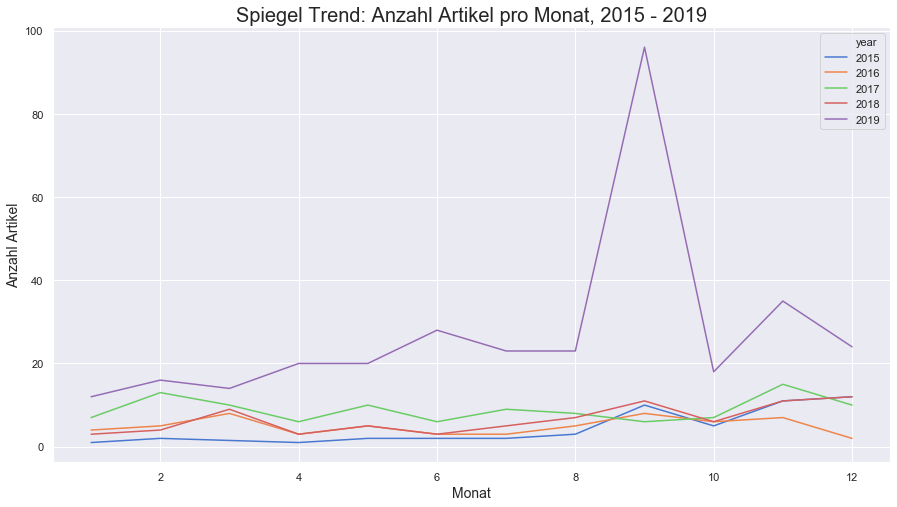

In [40]:
art_monatl = df_spiegel[["year","month","day","articles_counts"]]
g = art_monatl.groupby(['year','month'])['articles_counts'].sum()

g = pd.DataFrame(g)
g.reset_index(inplace=True)

fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
color = sns.color_palette('muted',5)
sns.lineplot(x='month', y='articles_counts', hue='year', palette=color, data=g)
axes.set_xlabel('Monat', size=14)
axes.set_ylabel('Anzahl Artikel', size=14)
axes.set_title('Spiegel Trend: Anzahl Artikel pro Monat, 2015 - 2019', size=20)

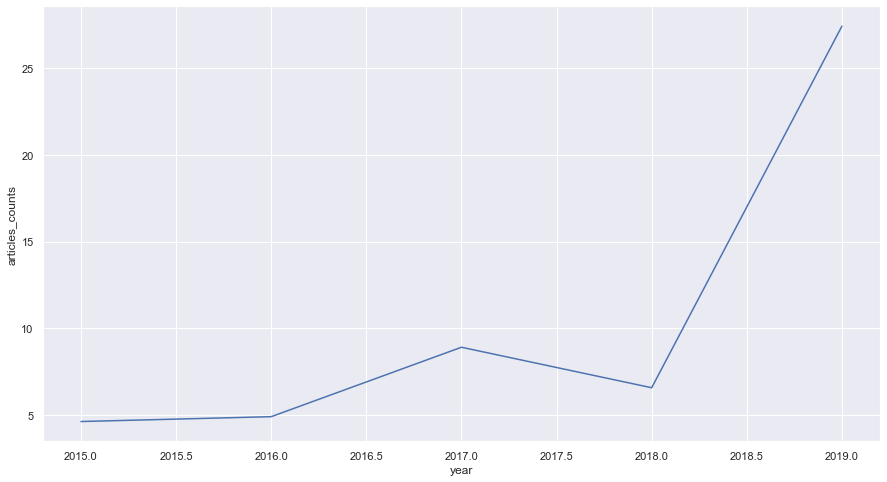

In [53]:
sns.lineplot(df_spiegel_var.groupby(['year']).mean().index, df_spiegel_var.groupby(['year']).mean().articles_counts)

Text(0.5, 1.0, 'Spiegel Trend: Anzahl User-Kommentare pro Monat, 2015 - 2019')

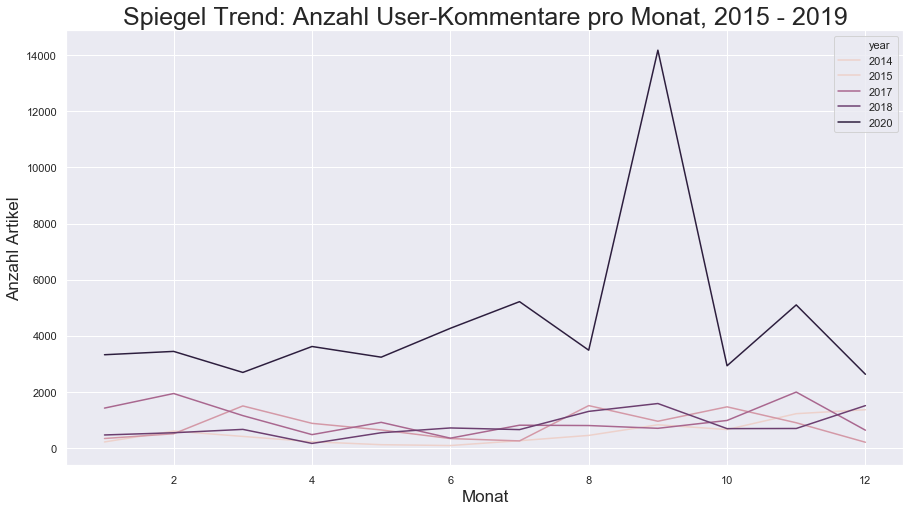

In [61]:
art_monatl = df_spiegel[["year","month","day","thread_counts"]]
g = art_monatl.groupby(['year','month'])['thread_counts'].sum()

g = pd.DataFrame(g)
g.reset_index(inplace=True)

fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
color = sns.color_palette('muted',6)
sns.lineplot(x='month', y='thread_counts', hue='year',data=g)
axes.set_xlabel('Monat', size=17)
axes.set_ylabel('Anzahl Artikel', size=17)
axes.set_title('Spiegel Trend: Anzahl User-Kommentare pro Monat, 2015 - 2019', size=25)

### Heat-Maps

#### Heatmap Anzahl Artikel verteilt nach Monat und Jahr 

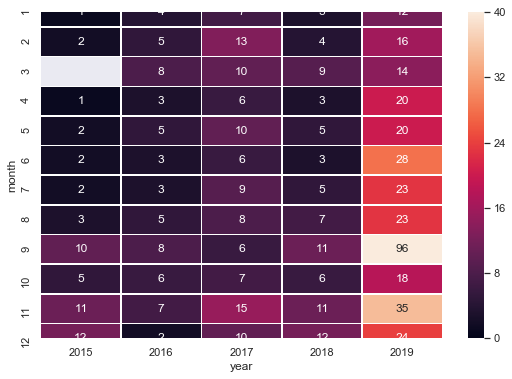

In [48]:
# Draw a heatmap with the numeric values in each cell
df_spiegel_var = df_spiegel[['month','year','articles_counts']].reset_index()
df_spiegel_var = df_spiegel_var.groupby(['month','year']).sum().reset_index()
df_spiegel_var_pivot = df_spiegel_var.pivot('month','year','articles_counts')
f, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(df_spiegel_var_pivot, annot=True,linewidths=.5,
           vmin=0, vmax=40, ax=ax)

### Verteilungskurven

#### Kommentare & Anzahl Artikel

Text(0.5, 0, 'Anzahl Artikel')

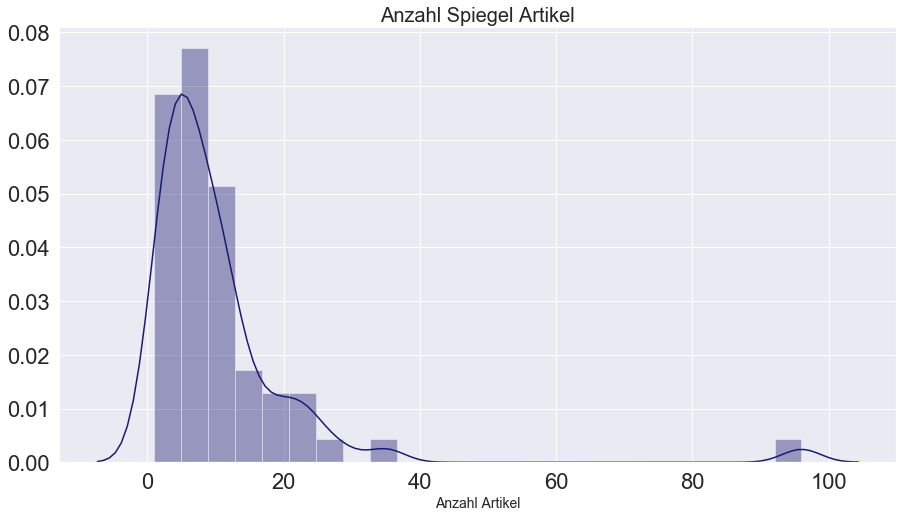

In [9]:
df_counts = df_spiegel[['articles_counts','word_counts','thread_counts',
                        'year','month']].dropna().groupby(['month','year']).sum()

fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111)
sns.distplot(df_counts.articles_counts, norm_hist=True,color='midnightblue')
axes.set_title('Anzahl Spiegel Artikel', size=20)
axes.set_xlabel('Anzahl Artikel', size=14)

Text(0.5, 0, 'Anzahl Wörter')

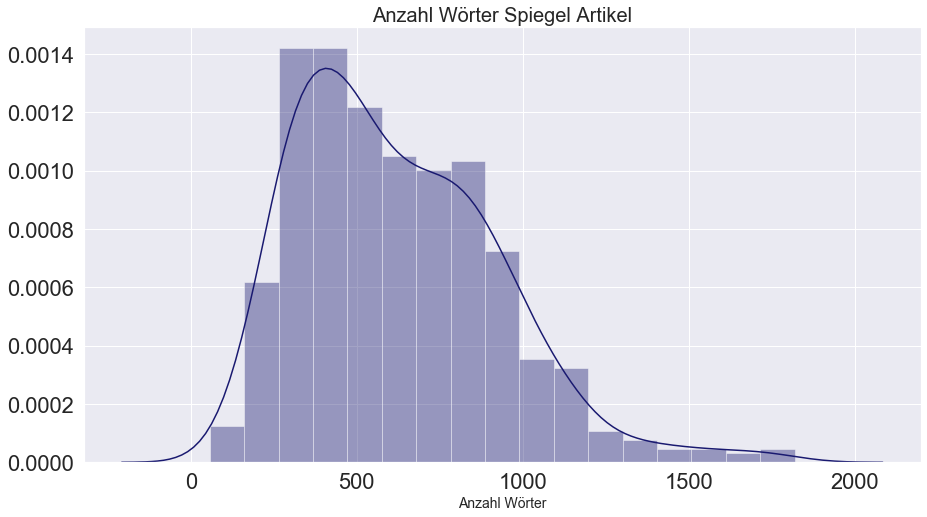

In [10]:
fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.word_counts, norm_hist=True, color='midnightblue')
axes.set_title('Anzahl Wörter Spiegel Artikel', size=20)
axes.set_xlabel('Anzahl Wörter', size=14)

Text(0.5, 0, 'Anzahl Kommentare')

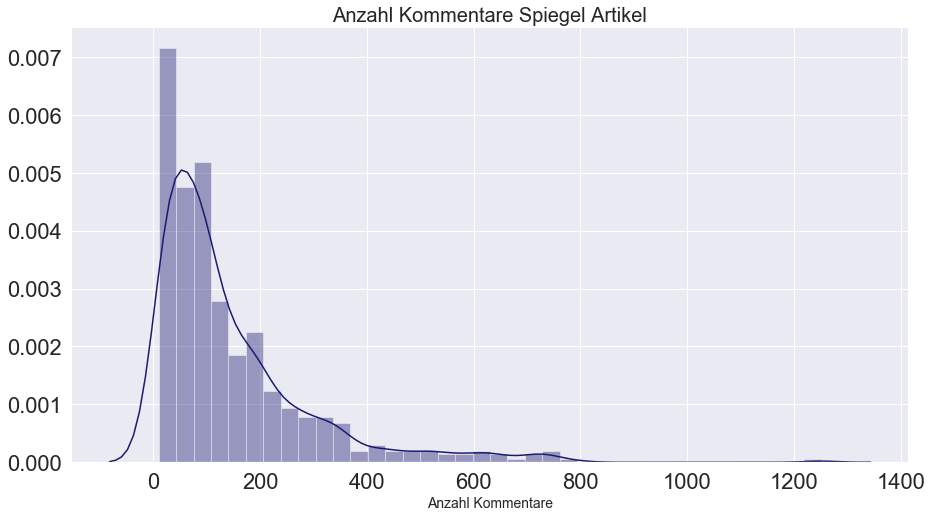

In [11]:
fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.thread_counts, norm_hist=True, color='midnightblue')
axes.set_title('Anzahl Kommentare Spiegel Artikel', size=20)
axes.set_xlabel('Anzahl Kommentare', size=14)

 ##### Spiegel Verteilung Lesbarkeitsindex

Lesbarkeitsindex: Index zwischen 0 und 1. O bedeutet schwer bis gar nicht lesbar (z.b. Akademiker-Niveau), hingegen symbolisiert 1 für eine einfach und klare Formulierung

Text(0.5, 1.0, 'Verteilung Lesbarkeitsindex Spiegel Artikel')

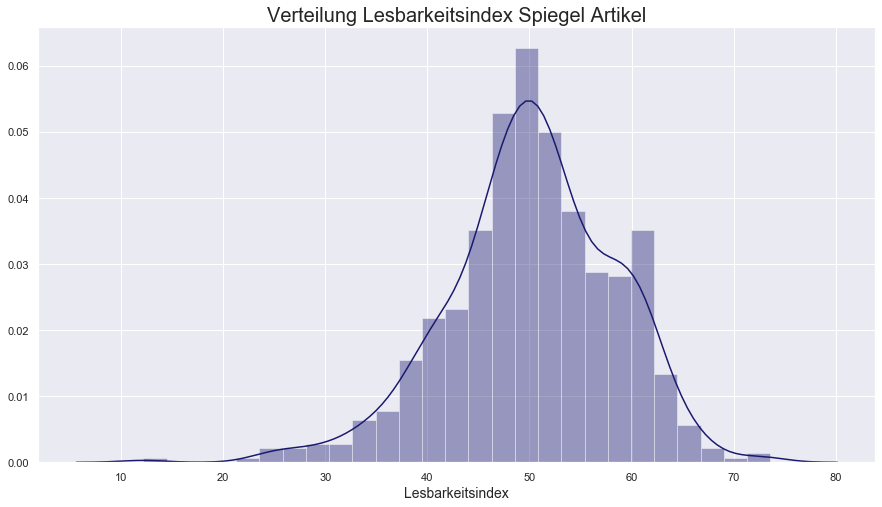

In [62]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.lesbarkeit.dropna(),color= 'midnightblue',kde=True)
axes.set_xlabel('Lesbarkeitsindex', size=14)
axes.set_title('Verteilung Lesbarkeitsindex Spiegel Artikel', size=20)

#### Sentimentsanalyse Spiegel

hier wird zwischen zwei Werten unterschieden:
Polarity: postive bzw. negative Fromulierung des Textes. Index zw. - 1 (sehr negativ) bis +1 (sehr positiv)
Subjektivität: wie stark die Meinung des Verfassers in den Text einfließt. 

Text(0.5, 1.0, 'Verteilung Polarity Spiegel Artikel')

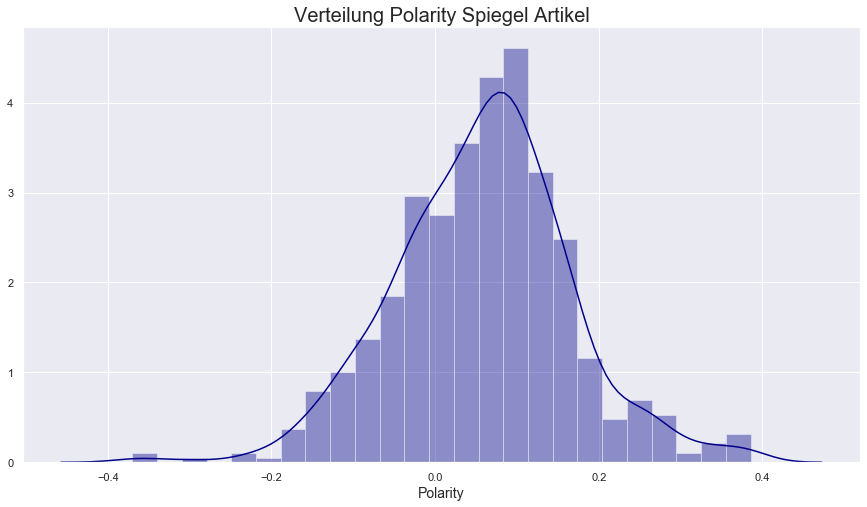

In [63]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.polarity.dropna(),color= 'darkblue',kde=True)
axes.set_xlabel('Polarity', size=14)
axes.set_title('Verteilung Polarity Spiegel Artikel', size=20)

Text(0.5, 1.0, 'Verteilung Subjectivity Spiegel Artikel')

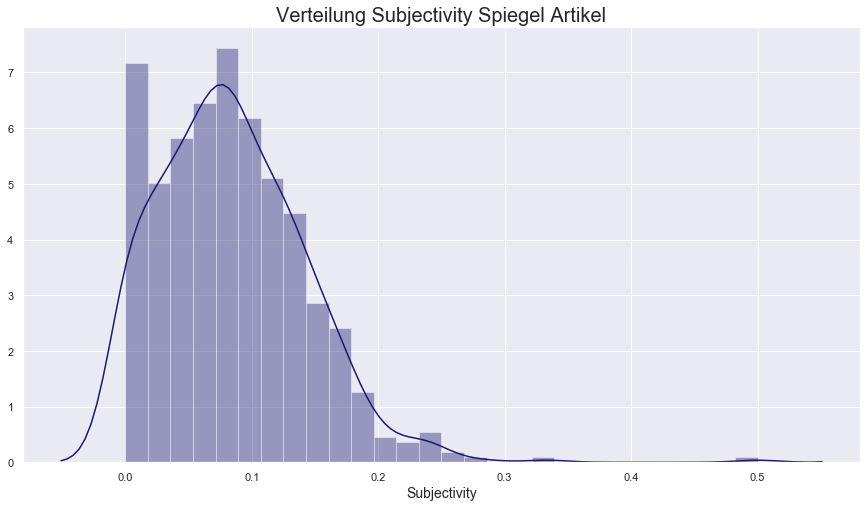

In [66]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.subjectivity.dropna(),color= 'midnightblue',kde=True)
axes.set_xlabel('Subjectivity', size=14)
axes.set_title('Verteilung Subjectivity Spiegel Artikel', size=20)

#### Histogram

(array([0.02040816, 0.12244898, 0.24489796, 0.2755102 , 0.2244898 ,
        0.1122449 ]),
 array([ 5.3  , 16.505, 27.71 , 38.915, 50.12 , 61.325, 72.53 ]),
 <a list of 6 Patch objects>)

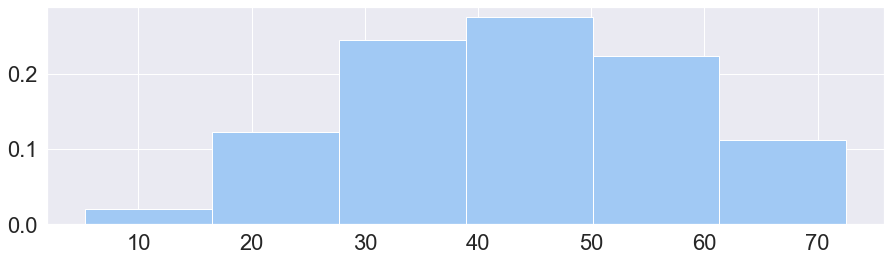

In [15]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
ax.hist(df_bild.lesbarkeit.dropna(), bins=6,
        weights=np.zeros_like(df_bild.lesbarkeit.dropna().values) + 1. / (df_bild.lesbarkeit.dropna().values).size)

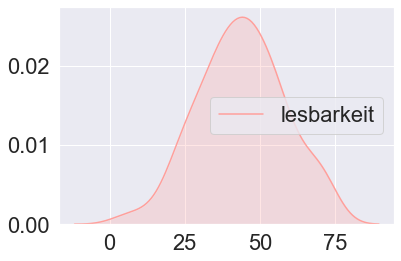

In [16]:
ax = sns.kdeplot(df_bild.lesbarkeit.dropna(), shade=True, color="r")

In [17]:
# Anzahl Artikel 
grouped = df_bild.groupby('year').agg({'word_counts':[sum,min,max, np.mean, np.median]})
grouped.columns = ['_'.join(x) for x in grouped.columns]
grouped

,word_counts_sum,word_counts_min,word_counts_max,word_counts_mean,word_counts_median
year,,,,,
2019,30167,26,1037,307.826531,281.5


Text(0.5, 1.0, 'Verteilung Anzahl Wörter Bild Artikel')

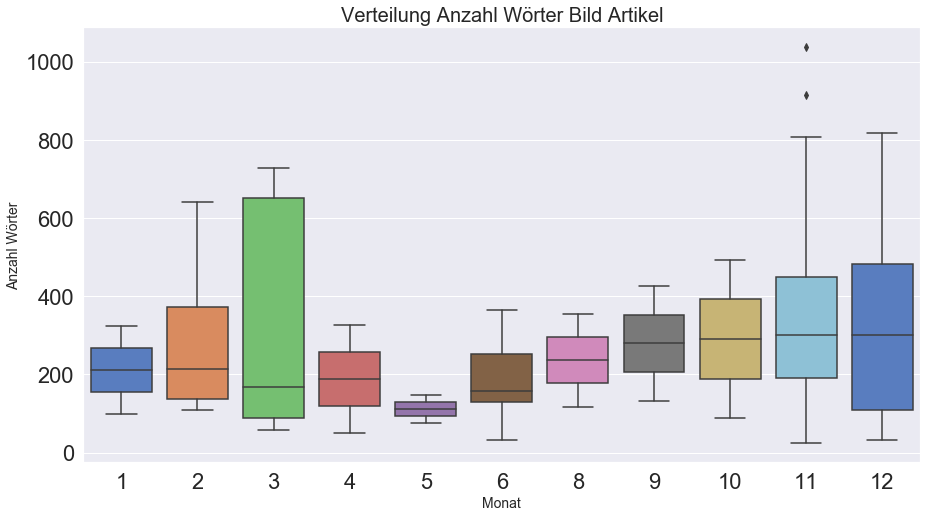

In [19]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
color = sns.color_palette('muted',11)
sns.boxplot(x="month", y="word_counts", data=df_bild,palette=color)
axes.set_xlabel('Monat', size=14)
axes.set_ylabel('Anzahl Wörter', size=14)
axes.set_title('Verteilung Anzahl Wörter Bild Artikel', size=20)

Text(0.5, 1.0, 'Verteilung Anzahl Wörter Spiegel Artikel')

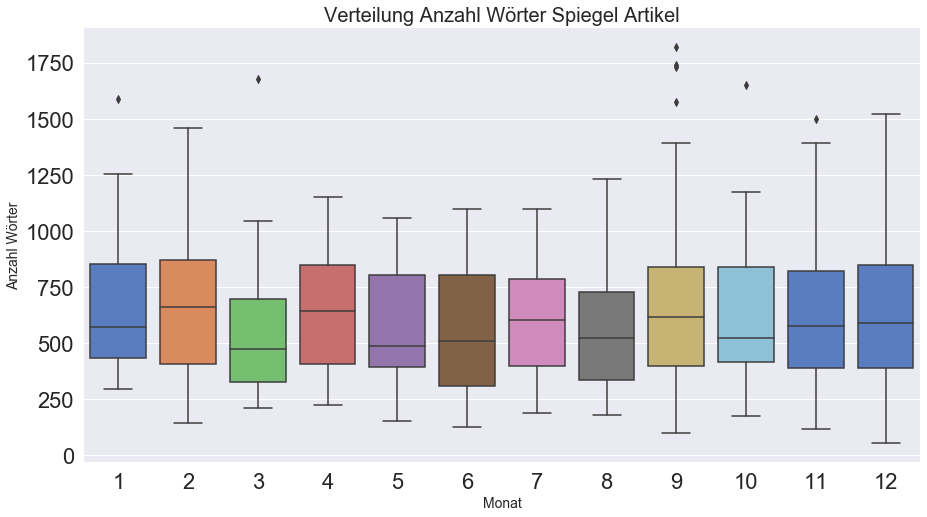

In [20]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
color = sns.color_palette('muted',11)
sns.boxplot(x="month", y="word_counts", data=df_spiegel,palette=color)
axes.set_xlabel('Monat', size=14)
axes.set_ylabel('Anzahl Wörter', size=14)
axes.set_title('Verteilung Anzahl Wörter Spiegel Artikel', size=20)

### Zusammenhänge

#### joint-plot Anzahl Kommentare und Anzahl Wörter in Artikel

Text(0.5, 1, 'Relation zwischen Anzahl Wörter und Anzahl Kommentare Spiegel Artikel')

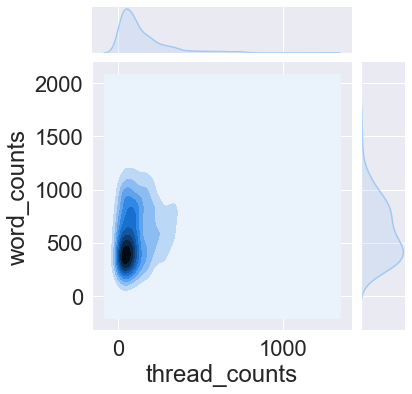

In [21]:
sns.jointplot(x='thread_counts', y='word_counts', data=df_spiegel, kind='kde')
axes.set_xlabel('Anzahl Kommentare', size=14)
axes.set_ylabel('Anzahl Wörter', size=14)
axes.set_title('Relation zwischen Anzahl Wörter und Anzahl Kommentare Spiegel Artikel', size=20)

#### joint-plot Lesbarkeit und Anzahl Wörter in Artikel

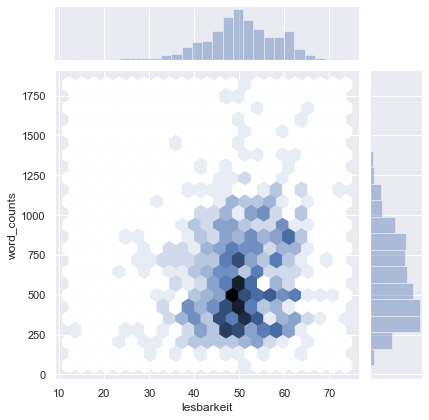

In [65]:
sns.jointplot(x='lesbarkeit', y='word_counts', data=df_spiegel, kind='hex')

#### joint-plot Anzahl Polarity und Anzahl Wörter in Artikel

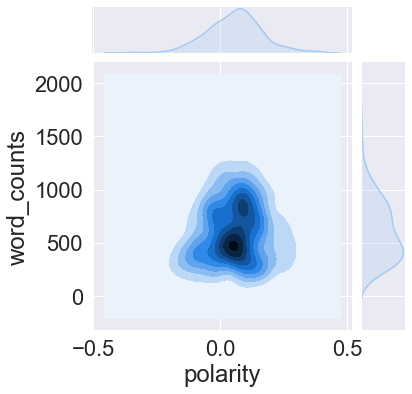

In [23]:
sns.jointplot(x='polarity', y='word_counts', data=df_spiegel, kind='kde')

#### joint-plot Anzahl Polarity und Anzahl Kommentare in Artikel

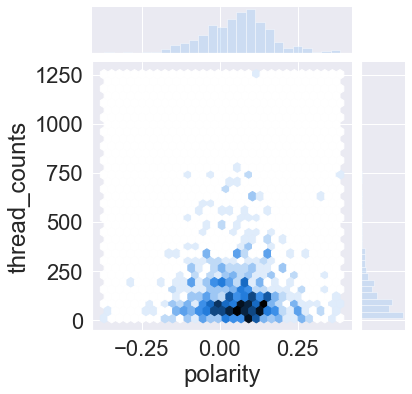

In [24]:
sns.jointplot(x='polarity', y='thread_counts', data=df_spiegel, kind='hex')

### SpiegelBild

#### Spiegel und Bild Arikel zusammengefasst und aggregiert auf den Zeitraum 11.11 bis 19.12.2019

In [67]:
# zum Vergleich Spiegel und BILD
df_spiegel11_12 = df_spiegel.query('year==2019')\
.query('(month == 11 and day >= 12) or (month==12 and day <=19)') # Einschränkung auf den Zeitraum 11.11 bis 19.12.2019

df_bild11_12 = df_bild.query('month >=11')

In [69]:
tmp_df_spiegel = pd.DataFrame({'word_counts': df_spiegel11_12.word_counts.copy(),
                              'lesbarkeit': df_spiegel11_12.lesbarkeit.copy(),
                             'Polarity': df_spiegel11_12.polarity.copy(),
                             'subjectivity': df_spiegel11_12.subjectivity.copy()})
tmp_df_spiegel['Quelle'] ='Spiegel'
tmp_df_bild = pd.DataFrame({'word_counts': df_bild11_12.word_counts.copy(),
                           'lesbarkeit':df_bild11_12.lesbarkeit.copy(),
                           'Polarity': df_bild11_12.polarity.copy(),
                           'subjectivity': df_bild11_12.subjectivity.copy()})
tmp_df_bild['Quelle'] ='Bild'
df_spiegelbild = pd.concat([tmp_df_spiegel, tmp_df_bild])
#df_spiegelbild['all'] = 1

#### Tabelle Vergleich Spiegel und Bild

In [27]:
df_spiegelbild.groupby('Quelle').describe().round(3)

word_counts                                                        \
              count     mean      std   min     25%    50%    75%     max   
Quelle                                                                      
Bild           72.0  329.431  231.871  26.0  140.25  301.5  469.0  1037.0   
Spiegel        53.0  599.208  293.330  57.0  378.00  509.0  815.0  1342.0   

        lesbarkeit          ... subjectivity          all                      \
             count    mean  ...          75%    max count mean  std  min  25%   
Quelle                      ...                                                 
Bild          72.0  45.510  ...        0.125  1.000  72.0  1.0  0.0  1.0  1.0   
Spiegel       53.0  49.853  ...        0.111  0.333  53.0  1.0  0.0  1.0  1.0   

                        
         50%  75%  max  
Quelle                  
Bild     1.0  1.0  1.0  
Spiegel  1.0  1.0  1.0  

[2 rows x 40 columns]

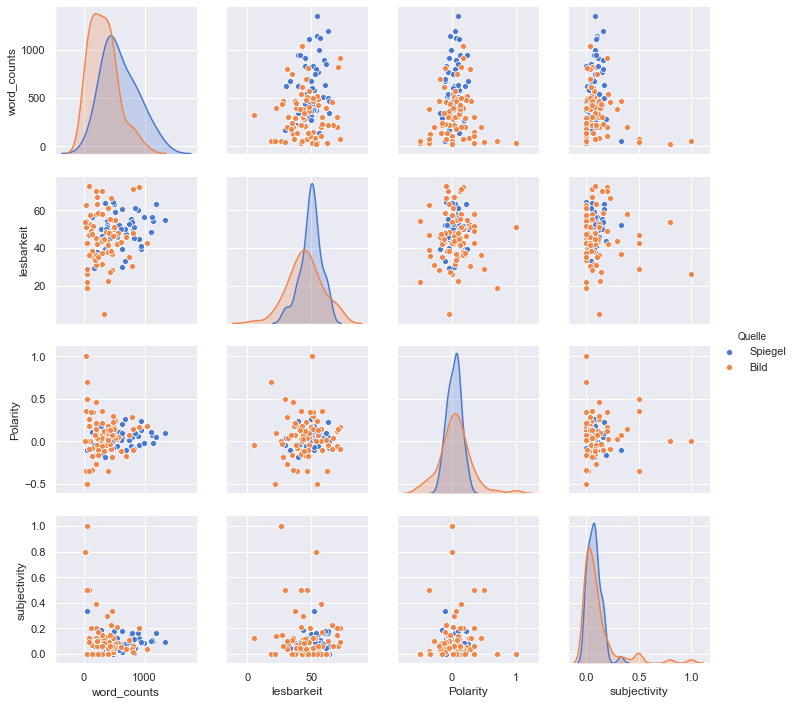

In [70]:
sns.pairplot(df_spiegelbild, hue='Quelle', palette='muted')

In [29]:
df_spiegelbild

,word_counts,lesbarkeit,Polarity,subjectivity,Quelle,all
Id,,,,,,
article_1p0.txt,1136,54.32,-0.024498,0.101205,Spiegel,1
article_1p1.txt,917,44.88,-0.047755,0.119048,Spiegel,1
article_1p10.txt,1117,56.49,0.072034,0.107345,Spiegel,1
article_1p11.txt,378,54.02,0.007407,0.018519,Spiegel,1
article_1p12.txt,1342,54.73,0.100958,0.090805,Spiegel,1
...,...,...,...,...,...,...
b_article_9p5.txt,233,58.42,-0.102381,0.166667,Bild,1
b_article_9p6.txt,301,58.01,0.352778,0.055556,Bild,1
b_article_9p7.txt,239,35.20,-0.158333,0.000000,Bild,1


#### Violine Plots

Text(0.5, 1.0, 'Verteilung Polarität')

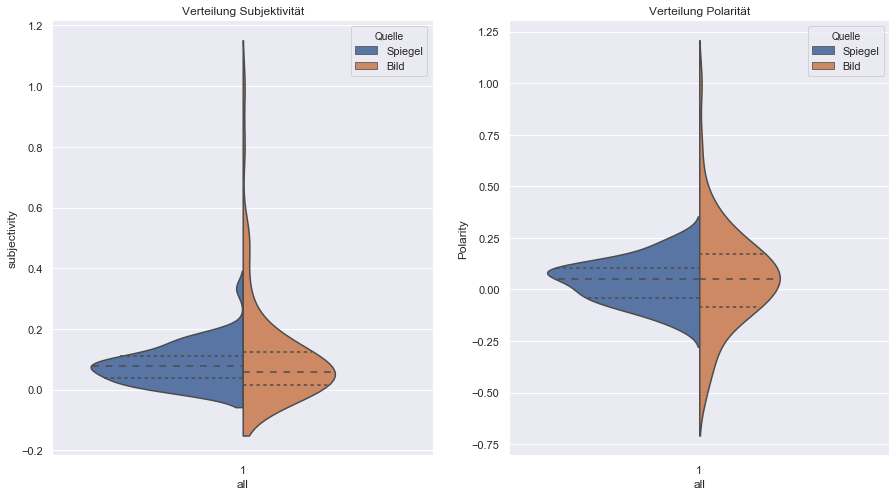

In [30]:
sns.set(rc={'figure.figsize':(15,8)})
f, axes = plt.subplots(1, 2)
sns.violinplot(x='all', y="subjectivity", hue="Quelle", data=df_spiegelbild, inner='quartile',
               ax=axes[0], split=True).set_title('Verteilung Subjektivität')
sns.violinplot(x="all", y="Polarity", hue="Quelle", data=df_spiegelbild, 
               inner='quartile', ax=axes[1], split=True).set_title('Verteilung Polarität')

Text(0.5, 1.0, 'Verteilung Anzahl Wörter in Artikel')

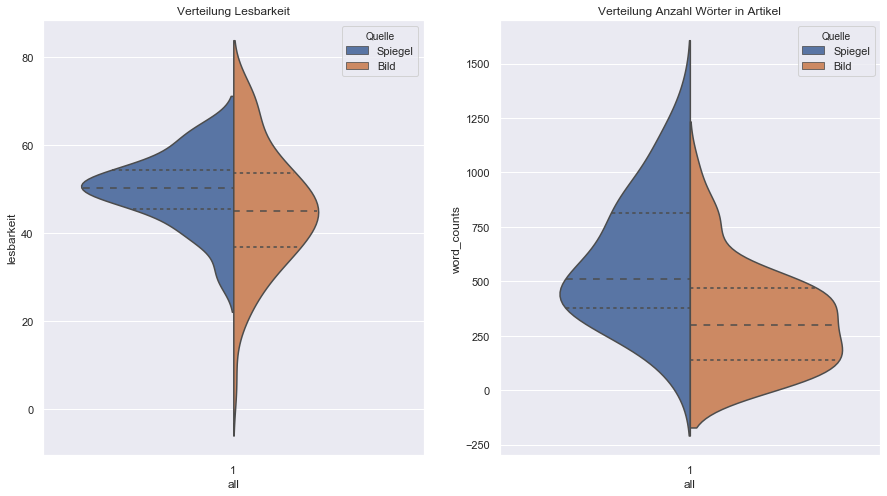

In [31]:
sns.set(rc={'figure.figsize':(15,8)})
f, axes = plt.subplots(1, 2)
sns.violinplot(x="all", y="lesbarkeit", hue="Quelle", data=df_spiegelbild, inner='quartile', 
               ax=axes[0], split=True).set_title('Verteilung Lesbarkeit')
sns.violinplot(x="all", y="word_counts", hue="Quelle", 
               data=df_spiegelbild, ax=axes[1], split=True, inner='quartile').set_title('Verteilung Anzahl Wörter in Artikel')

### Statistik Tests

In [32]:
import scipy.stats as stats

stats.mannwhitneyu(df_spiegelbild.query('Quelle == "Spiegel"')['lesbarkeit'].values,
                   df_spiegelbild.query('Quelle == "Bild"')['lesbarkeit'].values)

stats.ttest_ind(df_spiegelbild.query('Quelle == "Spiegel"')['lesbarkeit'].values,
                df_spiegelbild.query('Quelle == "Bild"')['lesbarkeit'].values)

In [33]:
col_names = list(df_spiegelbild.columns)[:-2]

liste_ttest = []
liste_mann = []
for x in col_names:
    liste_ttest.append(stats.ttest_ind(df_spiegelbild.query('Quelle == "Spiegel"')[x].values,
                    df_spiegelbild.query('Quelle == "Bild"')[x].values))
    
    liste_mann.append(stats.mannwhitneyu(df_spiegelbild.query('Quelle == "Spiegel"')[x].values,
                   df_spiegelbild.query('Quelle == "Bild"')[x].values))

    

In [34]:
df_stat_test = pd.DataFrame({'var_name':col_names,
                            'ttest_statistik':np.array(liste_ttest)[:,0],
                            'ttest_pvalue':np.array(liste_ttest)[:,1],
                            'mann_statistik':np.array(liste_mann)[:,0],
                            'mann_pvalue':np.array(liste_mann)[:,1]})

In [35]:
df_stat_test.set_index(['var_name']).round(3)

,ttest_statistik,ttest_pvalue,mann_statistik,mann_pvalue
var_name,,,,
word_counts,5.741,0.000,895.0,0.000
lesbarkeit,2.101,0.038,1418.5,0.007
Polarity,-0.458,0.648,1823.0,0.336
subjectivity,-1.419,0.158,1827.5,0.344
